In [5]:
import pandas as pd 
import seaborn 
import matplotlib.pyplot as plt
%matplotlib inline 

Notebook to investigate if recent rise in fatalities is statistically significant or not and to visualize findings 

In [6]:
df = pd.read_csv("accidentdata.csv")
df.head()

/Users/zacharythomas/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR,Involved drunk driver
0,1,10001,1.0,1,0.0,0,0.0,1.0,1,127,...,2,58,88,88,0,0,0,1,1,1
1,1,10002,1.0,1,0.0,0,0.0,1.0,1,83,...,22,20,88,88,0,0,0,1,0,0
2,1,10003,1.0,1,0.0,0,0.0,2.0,2,11,...,1,45,99,99,0,0,0,1,1,1
3,1,10004,1.0,1,0.0,0,0.0,1.0,1,45,...,1,15,88,88,0,0,0,1,1,1
4,1,10005,2.0,2,0.0,0,0.0,2.0,2,45,...,7,16,88,88,0,0,0,1,0,0


In [7]:
df.columns.values

array(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY',
       'MONTH', 'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB',
       'FUNC_SYS', 'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT',
       'LATITUDE', 'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1',
       'RELJCT2', 'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND',
       'WEATHER1', 'WEATHER2', 'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR',
       'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1',
       'CF2', 'CF3', 'FATALS', 'DRUNK_DR', 'Involved drunk driver'], dtype=object)

In [8]:
df.YEAR.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001])

In [9]:
fatal = df.groupby(['YEAR'])['FATALS'].sum()

In [22]:
fatal

YEAR
2001    42195
2002    43004
2003    42883
2004    42835
2005    43509
2006    42707
2007    41258
2008    37422
2009    33882
2010    32998
2011    32478
2012    33781
2013    32892
2014    32743
2015    35092
Name: FATALS, dtype: int64

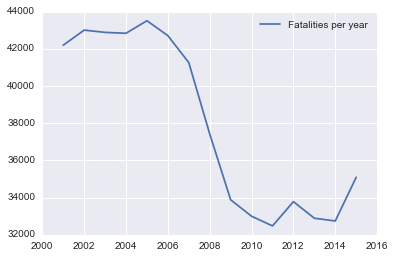

In [29]:
plt.plot(fatal.index.values, fatal, label = "Fatalities per year")
plt.legend()

Now we can use a Poisson distribution to create confidence intervals around each year!

To answer specifically if the spike in 2015 (to ~35000 deaths) was signficant we can use some statistics: 

Let's assume the number of deaths each year is a Poisson process, a distribution that describes the occurrence of events over a given time period. In 2014, the mean rate is 32743 deaths per year, i.e. lambda = 32743, n = 1. 

P(X > 35000) = 1 - P(X < 35000) = 1 - Poisson_cdf(35000) = 1 - exp(-32743)(summation[i = 0 to 3500]{(32743^i)/(i!)})= 0. 

It's significantly different! There's no chance of a jump to an annual mean that large. 

Or, more succinctly using Python's scipy package: 

In [1]:
import scipy.stats as scs 
1 - scs.poisson.cdf(35000,32743)
    

0.0

We can also calculate a 95% confidence interval for the year 2014. Clearly, 35000 is outside of this range: 

In [3]:
x_bar = 32743

print "Upper Bound:\t", x_bar + 1.96*(x_bar/1)**.5
print "Lower Bound:\t", x_bar - 1.96*(x_bar/1)**.5


Upper Bound:	33097.662528
Lower Bound:	32388.337472
